In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
from tensorflow.keras import models,datasets,layers

In [ ]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()

170500096/170498071 [==============================] - 12s 0us/step


In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:

y_train = y_train.reshape(-1,)
y_train[:5] # here we reshape our test dataset to one dimensional 

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:

y_test = y_test.reshape(-1,)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]#these are the given classes 

In [ ]:
def plot_sample(X,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])


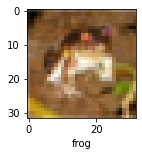

In [ ]:

plot_sample(X_train, y_train, 0)

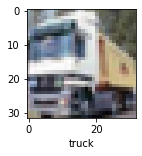

In [ ]:

plot_sample(X_train, y_train, 1)

In [ ]:

X_train = X_train / 255.0
X_test = X_test / 255.0 #normallzing training data

In [ ]:
ann=models.Sequential([
      layers.Flatten(input_shape=(32,32,3)),
      layers.Dense(3000, activation='relu'),
      layers.Dense(1000, activation='relu'),
      layers.Dense(10, activation='softmax')
])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 11s 6ms/step - loss: 1.8151 - accuracy: 0.3576
Epoch 2/5
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6262 - accuracy: 0.4256
Epoch 3/5
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5442 - accuracy: 0.4551
Epoch 4/5
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4853 - accuracy: 0.4758
Epoch 5/5
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4330 - accuracy: 0.4948


In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.35      0.71      0.47      1000
           1       0.65      0.48      0.55      1000
           2       0.40      0.28      0.33      1000
           3       0.38      0.22      0.28      1000
           4       0.44      0.37      0.40      1000
           5       0.42      0.33      0.37      1000
           6       0.53      0.55      0.54      1000
           7       0.55      0.52      0.54      1000
           8       0.48      0.68      0.56      1000
           9       0.53      0.53      0.53      1000

    accuracy                           0.47     10000
   macro avg       0.47      0.47      0.46     10000
weighted avg       0.47      0.47      0.46     10000



In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPool2D((2,2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [ ]:
cnn.fit(X_train,y_train,epochs=22)

Epoch 1/22
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4768 - accuracy: 0.4691
Epoch 2/22
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1381 - accuracy: 0.5992
Epoch 3/22
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9975 - accuracy: 0.6524
Epoch 4/22
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9093 - accuracy: 0.6850
Epoch 5/22
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8451 - accuracy: 0.7080
Epoch 6/22
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7880 - accuracy: 0.7271
Epoch 7/22
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7406 - accuracy: 0.7416
Epoch 8/22
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6930 - accuracy: 0.7570
Epoch 9/22
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6545 - accuracy: 0.7723
Epoch 10/22
1563/1563 [==============================] - 9s 6ms/step - loss: 0.623

In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.2451 - accuracy: 0.6846


[1.245131254196167, 0.6845999956130981]

In [ ]:

y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

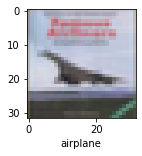

In [ ]:
plot_sample(X_test,y_test,3)


In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[1.58397415e-05, 9.14483167e-07, 1.24865642e-03, 9.59937215e-01,
        3.48735412e-05, 3.02780233e-03, 3.54316980e-02, 2.65927083e-05,
        2.45257601e-04, 3.12123339e-05],
       [5.86100342e-03, 1.97674590e-03, 1.27699513e-08, 5.19929921e-09,
        7.63029462e-08, 2.55739252e-09, 3.49443807e-11, 5.56227508e-10,
        9.91636455e-01, 5.25690441e-04],
       [1.42402221e-02, 3.48120958e-01, 3.34714394e-04, 6.13222714e-04,
        9.68384556e-04, 7.61413394e-05, 6.26124849e-04, 8.23512019e-05,
        6.33898020e-01, 1.03996682e-03],
       [9.54630256e-01, 5.90849260e-04, 5.37396781e-03, 3.24327324e-04,
        3.50066948e-05, 2.01266198e-06, 2.52132249e-05, 4.49745448e-06,
        3.89795862e-02, 3.43361171e-05],
       [5.52712116e-08, 5.45654586e-07, 5.13098855e-03, 1.04155764e-01,
        1.48305714e-01, 2.60925561e-04, 7.42145538e-01, 7.48311777e-08,
        3.92477887e-07, 2.31297648e-08]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

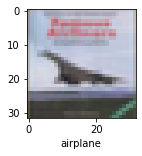

In [ ]:

plot_sample(X_test, y_test,3)

In [ ]:
classes[y_classes[3]]

'airplane'

In [ ]:
cnn.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 64)                147520    
_________________________________________________________________
dense_12 (Dense)             (None, 10)               

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.35      0.71      0.47      1000
           1       0.65      0.48      0.55      1000
           2       0.40      0.28      0.33      1000
           3       0.38      0.22      0.28      1000
           4       0.44      0.37      0.40      1000
           5       0.42      0.33      0.37      1000
           6       0.53      0.55      0.54      1000
           7       0.55      0.52      0.54      1000
           8       0.48      0.68      0.56      1000
           9       0.53      0.53      0.53      1000

    accuracy                           0.47     10000
   macro avg       0.47      0.47      0.46     10000
weighted avg       0.47      0.47      0.46     10000



In [ ]:
mat=confusion_matrix(y_test,y_classes)

In [ ]:
mat

array([[769,   5,  50,  26,  16,   9,   8,  23,  66,  28],
       [ 29, 746,   8,  20,  10,  13,  11,  12,  43, 108],
       [ 68,   4, 565,  73, 104,  55,  62,  54,   9,   6],
       [ 27,   3,  55, 536,  80, 162,  64,  55,  10,   8],
       [ 24,   1,  53,  76, 664,  38,  31, 105,   7,   1],
       [ 10,   1,  36, 188,  58, 617,  19,  60,   6,   5],
       [  9,   1,  41,  92,  42,  30, 765,  14,   5,   1],
       [  9,   2,  24,  41,  47,  51,   6, 807,   4,   9],
       [ 60,  20,  26,  18,  12,   9,   8,  10, 817,  20],
       [ 34,  61,  10,  28,  10,  10,   9,  29,  33, 776]])

In [ ]:
import seaborn as sns

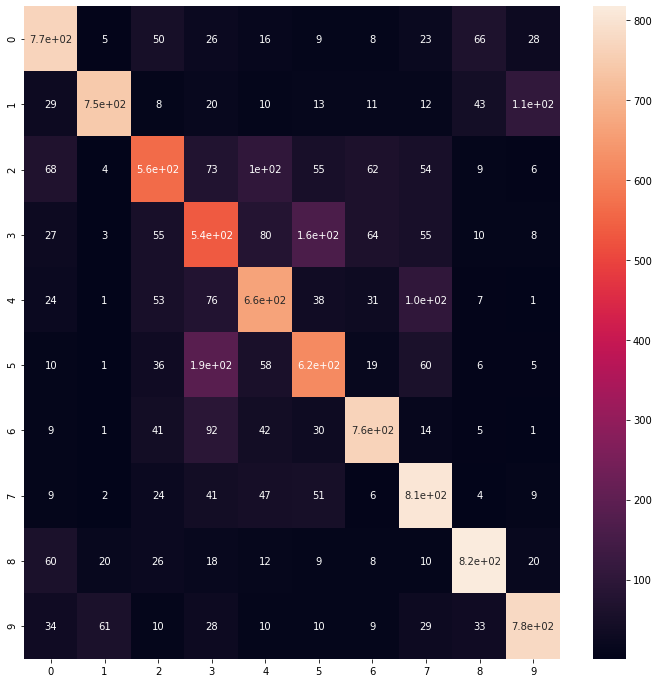

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(mat,annot=True)
            

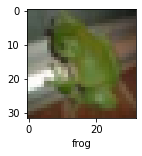

In [ ]:
plot_sample(X_test, y_test,7)

In [ ]:
classes[y_classes[7]]

'frog'